<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Iris_Dataset_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
# Load Data
df = datasets.load_iris()

X, y = df.data, df.target

In [10]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
scaler = StandardScaler().fit(X)

In [14]:
X = scaler.transform(X)

print(np.min(X), np.max(X))

In [16]:
y = tf.keras.utils.to_categorical(y, 3)

In [18]:
print(y.shape)

(150, 3)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [22]:
num_classes = 3

model = Sequential()
model.add(Dense(128, input_shape=(4,), name='Hidden-Layer-1', activation='relu'))
model.add(Dense(128, name='Hidden-Layer-2', activation='relu'))
model.add(Dense(num_classes, name='Output-Layer', activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


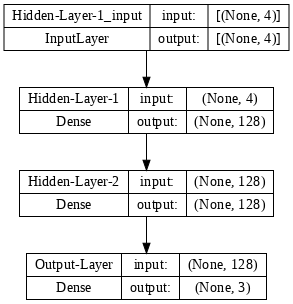

In [23]:
tf.keras.utils.plot_model(model=model, dpi=72, show_shapes=True)

In [25]:
batch_size = 16
epochs = 10
validation_split = 0.2
verbose = 1

history = model.fit(X_train, 
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose,
                    validation_split=validation_split)

Epoch 1/10
6/6 [==============================] - 1s 46ms/step - loss: 0.9919 - accuracy: 0.5938 - val_loss: 0.8788 - val_accuracy: 0.8333
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.7684 - accuracy: 0.8229 - val_loss: 0.7037 - val_accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6236 - accuracy: 0.8229 - val_loss: 0.5651 - val_accuracy: 0.8750
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.5152 - accuracy: 0.8229 - val_loss: 0.4655 - val_accuracy: 0.8750
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.4436 - accuracy: 0.8333 - val_loss: 0.3975 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3903 - accuracy: 0.8333 - val_loss: 0.3456 - val_accuracy: 0.8750
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3501 - accuracy: 0.8438 - val_loss: 0.3063 - val_accuracy: 0.8750
Epoch 8/10
6/6 [=================